<a href="https://colab.research.google.com/github/zfukuoka/Training-KikaiGakusyuZukan/blob/master/Chap3_10_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3章 教師なし学習

## 10 PCA(Principal Component Analysis)

ポイント
* 日本語で表すと主成分分析のこと
* 主成分分析のメリットは多くのパラメータ（多次元）をより少ないパラメータ（小次元）にできること
  * この少ないパラメータにしたもので重要度の高い順から第1主成分、第2主成分... のように呼称
  * このような次元圧縮をするには、もともとのパラメータに相関関係があることが前提で相関関係のないデータでは、機能しない
* 数学（線形代数？）的にみると、固有値、固有ベクトルが関わってくる
  * どこぞの授業でも固有値、固有ベクトルの話がでてきたが、あまり記憶に残っていないので復習が必要
  * この主成分分析では、各々の主成分毎に固有値、固有ベクトルを持っている？
    * 各主成分毎の固有値を固有値の総和で割ると、主成分の重要度を割合で表すことができ、これを「寄与率」という
    * 寄与率を第一主成分から足し合わせたものを「累計寄与率」という

In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()
n_components = 2 # 削除後の次元を2に設定
model = PCA(n_components=n_components)
model = model.fit(data.data)

print(model.transform(data.data))

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

上記のテキストのサンプルだけではよくわからないので、調査をしてみたが表示しているデータがどんなものか、寄与率を可視化したい。

下記のコードで試した限りでは、主成分分析の数を２～４までとした場合、どれも第1主成分の寄与率が高く。あまり分析数を増やす意味がないように考えられる。

In [5]:
x = model.transform(data.data)
print(x.shape)
# print(model.transform(data.data))
print(model.explained_variance_ratio_)
model2 = PCA(n_components=3)
model2 = model2.fit(data.data)
x2 = model2.transform(data.data)
print(x2.shape)
# print(model2.transform(data.data))
print(model2.explained_variance_ratio_)
model3 = PCA(n_components=4)
model3 = model3.fit(data.data)
x3 = model3.transform(data.data)
print(x3.shape)
# print(model3.transform(data.data))
print(model3.explained_variance_ratio_)



(150, 2)
[0.92461872 0.05306648]
(150, 3)
[0.92461872 0.05306648 0.01710261]
(150, 4)
[0.92461872 0.05306648 0.01710261 0.00521218]


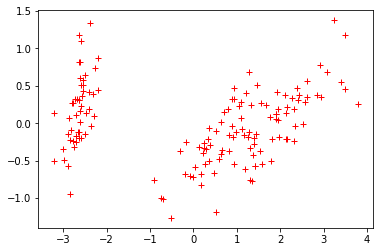

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
result = model.transform(data.data)

ax.plot(result[0:,0], result[0:,1], 'r+')
fig.show()